In [1]:
import ptc_track.madx_configuration as configuration
import ptc_track.transporter as transporter_builder
import extrapolated_crossing_angle.transporter as extrapolated_transport
import visualization.visualize as plotter
import data.grid_configuration as buc
import data.particles_generator as pg
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from data.parameters_names import ParametersNames as Parameters

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
%cd ..
%cd ..

/home/jakub/Desktop/optic_files/optics_generator_python
/home/jakub/Desktop/optic_files


In [4]:
#path_to_project = "/home/jakub/Desktop/optic_files"
path_to_project = %pwd

In [5]:
folder_name = "2017_matched1"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration_xa1 = configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [6]:
folder_name = "2017_matched2"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration_xa2 = configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [7]:
folder_name = "2017_matched"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [8]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.15

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 131

bunch_configuration = buc.GridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)
particles = pg.generate_from_range(bunch_configuration)

In [9]:
title_sufix = "2017 nominal, track"

In [10]:
segments = transporter_builder.get_transporter(track_configuration)(particles)

In [11]:
import data.particles_generator as pg
particles = pg.generate_from_range(bunch_configuration)

In [12]:
segments_extrapolated = extrapolated_transport.transport(particles, 190, track_configuration_xa1, 120, track_configuration_xa2, 140)

In [13]:
matrix = segments["end"]

In [14]:
alt_matrix = segments_extrapolated["end"]

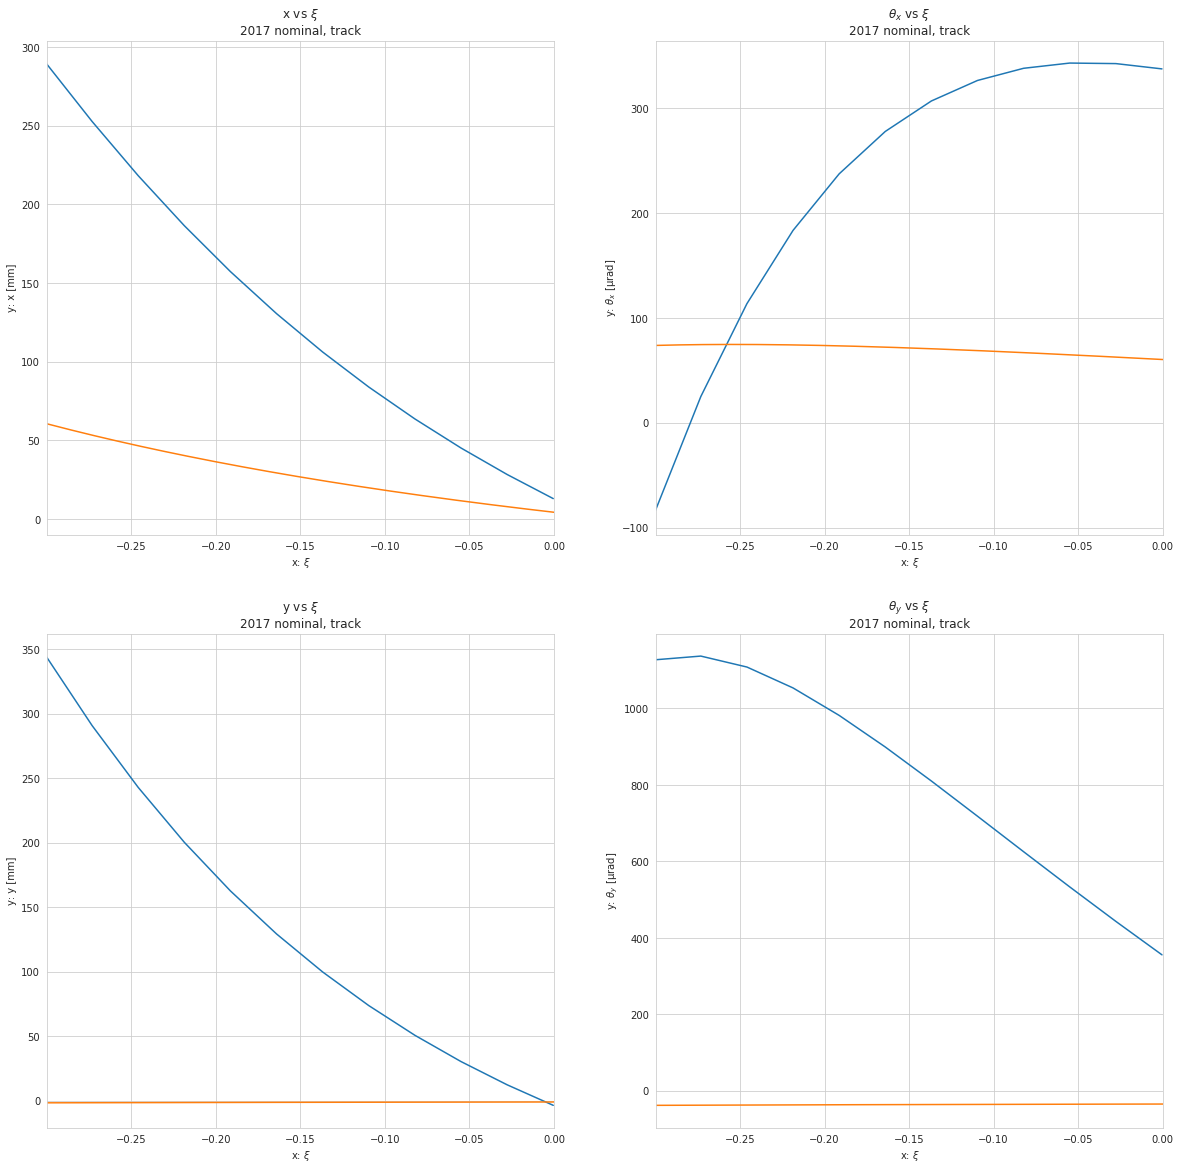

In [15]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

plotter.plot_from_one_matrix(Parameters.PT, Parameters.X, matrix, title_sufix, ax=axes[0][0])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.X, alt_matrix, title_sufix, ax=axes[0][0])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.THETA_X, matrix, title_sufix, ax=axes[0][1])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.THETA_X, alt_matrix, title_sufix, ax=axes[0][1])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.Y, matrix, title_sufix, ax=axes[1][0])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.Y, alt_matrix, title_sufix, ax=axes[1][0])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.THETA_Y, matrix, title_sufix, ax=axes[1][1])
plotter.plot_from_one_matrix(Parameters.PT, Parameters.THETA_Y, alt_matrix, title_sufix, ax=axes[1][1])

In [16]:
matrix

In [17]:
def transporter_extrapolation(particles):
    segments_extrapolated = extrapolated_transport.transport(particles, 190, track_configuration_xa1, 120, track_configuration_xa2, 140)
    return segments_extrapolated

In [18]:
import comparators.transport as transport_compare
import ptc_track.transporter as ptg
ptc_track_transporter = ptg.get_transporter(track_configuration)

In [19]:
transporters = {
    "extrapolation": transporter_extrapolation,
    "normal_transport": ptc_track_transporter
}

{'extrapolation - normal_transport': <data.particles.Particles object at 0x7f96b30364a8>}


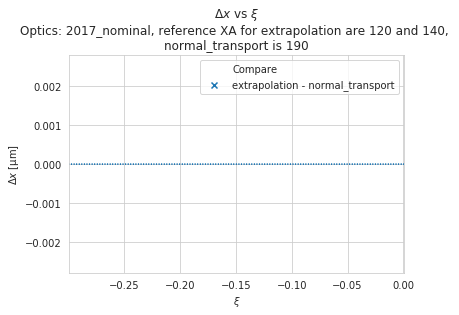

In [20]:
title_sufix = "Optics: 2017_nominal, reference XA for extrapolation are 120 and 140, \nnormal_transport is 190"
transport_compare.compare(particles, transporters, Parameters.X, Parameters.PT, title_sufix=title_sufix)

In [21]:
|

SyntaxError: invalid syntax (<ipython-input-21-4b37ef281455>, line 1)